# Official Efficiency Plots for 2017, Before TS1

In [3]:
from kepler.analysis.efficiency.utils import GetHistogramRootPaths, GetHistogramFromMany, GetProfile
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle

import rootplotlib as rpl
rpl.set_atlas_style()
rpl.suppress_root_warnings()

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


Applying ATLAS style settings...


## 1) Read all files:

### 1.1) Create keys and paths

In [4]:
triggers = [
            'HLT_e26_lhtight_nod0_ivarloose',
            'HLT_e26_lhtight_nod0_ringer_ivarloose',
            'HLT_e28_lhtight_nod0_ivarloose',
            'HLT_e28_lhtight_nod0_ringer_ivarloose',
            'HLT_e17_lhvloose_nod0_L1EM15VHI',
            'HLT_e17_lhvloose_nod0_ringer_L1EM15VHI',
            'HLT_e60_lhmedium_nod0',
            'HLT_e60_lhmedium_nod0_ringer',
            ]
paths, keys =  GetHistogramRootPaths( triggers, removeInnefBefore=False, is_emulation=False)

Making paths...: 100%|██████████| 8/8 [00:00<00:00, 19599.55it/s]


### 1.2) Read 2017 data:

In [5]:
path = '/home/jodafons/public/cern_data/data17_13TeV/Mon/EGAM1/before_ts1'
h_data17_before_ts1 = GetHistogramFromMany(path, paths, keys)

Loading: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


In [6]:
path = '/home/jodafons/public/cern_data/data17_13TeV/Mon/EGAM7/before_ts1/user.*'
h_data17_before_ts1_egam7 = GetHistogramFromMany(path, paths, keys)

Loading: 100%|██████████| 172/172 [00:20<00:00,  8.45it/s]


## 2) Official plots (e28 ringer vs noringer 2017, after TS1):

Compare ringer and noringer (backup triggers) chains.

In [12]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

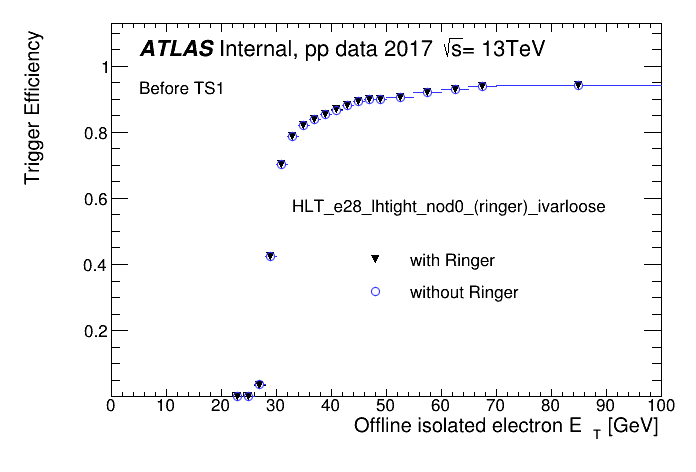

In [13]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_et'],
                               h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_et']),
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_match_et'],
                               h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_et']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35,['with Ringer', 'without Ringer'] )
rpl.add_text( 0.42, 0.55, 'HLT_e28_lhtight_nod0_(ringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.8, 'Before TS1', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig('output/eff_EGAM1_e28_ringer_and_noringer_2017_before_ts1_HLT_et.pdf')

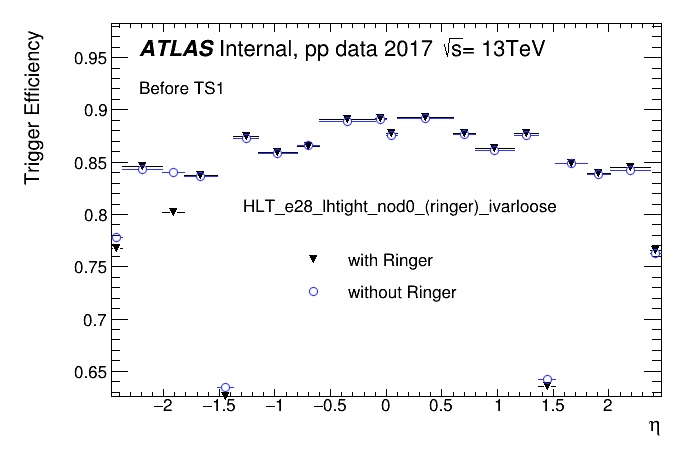

In [17]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_match_eta'],
                               h_data17_before_ts1['HLT_e28_lhtight_nod0_ivarloose_HLT_eta']),
            rpl.hist1d.divide( h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_match_eta'],
                               h_data17_before_ts1['HLT_e28_lhtight_nod0_ringer_ivarloose_HLT_eta']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.4,0.35,['with Ringer', 'without Ringer'] )
rpl.add_text( 0.35, 0.55, 'HLT_e28_lhtight_nod0_(ringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.8, 'Before TS1', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig('output/eff_EGAM1_e28_ringer_and_noringer_2017_before_ts1_HLT_eta.pdf')

### 2.1) Check fake rejection for FastCalo step:

**NOTE**: For Run-2, to get the fast-calo boolean, point the histogram to L2

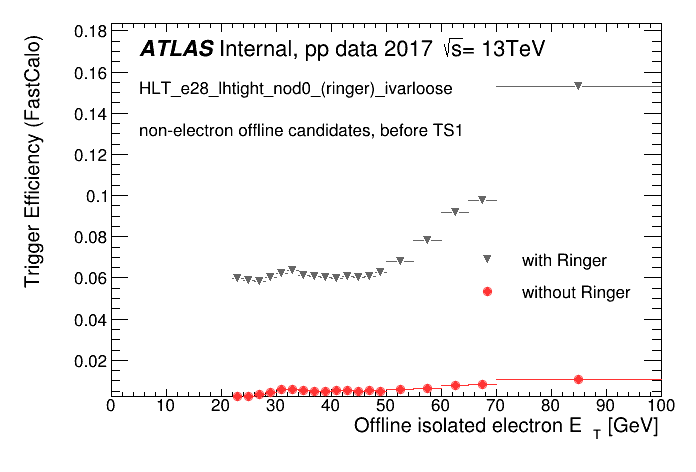

In [32]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            rpl.hist1d.divide( h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_et'],
                               h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_et']),
            rpl.hist1d.divide( h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_match_et'],
                               h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_et']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label( 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text( 0.2, 0.80, 'HLT_e28_lhtight_nod0_(ringer)_ivarloose', textsize=0.04)
rpl.add_text( 0.2, 0.71, 'non-electron offline candidates, before TS1', textsize=0.04)
add_legend( 0.65,0.35,['with Ringer', 'without Ringer'] )
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig('output/eff_EGAM7_e28_ringer_and_noringer_2017_before_ts1_L2Calo_et.pdf')

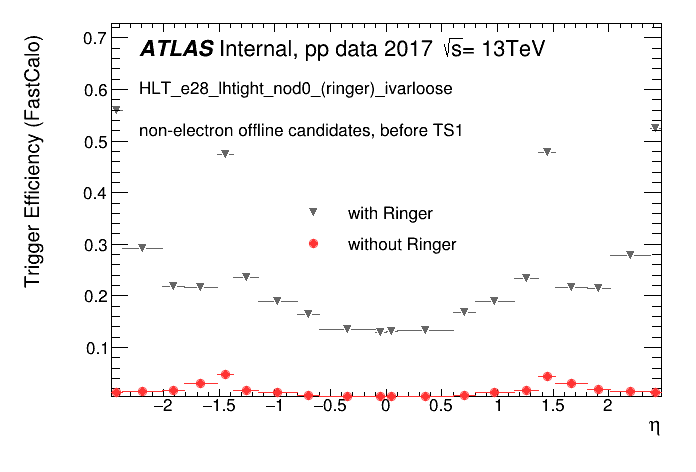

In [39]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            rpl.hist1d.divide( h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_match_eta'],
                               h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ivarloose_L2_eta']),
            rpl.hist1d.divide( h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_match_eta'],
                               h_data17_before_ts1_egam7['HLT_e28_lhtight_nod0_ringer_ivarloose_L2_eta']),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label( 0.2, 0.88, 'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text( 0.2, 0.80, 'HLT_e28_lhtight_nod0_(ringer)_ivarloose', textsize=0.04)
rpl.add_text( 0.2, 0.71, 'non-electron offline candidates, before TS1', textsize=0.04)
add_legend( 0.4,0.45,['with Ringer', 'without Ringer'] )
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.3) 
fig.show()
fig.savefig('output/eff_EGAM7_e28_ringer_and_noringer_2017_before_ts1_L2Calo_eta.pdf')